En este notebook encontrarán los pasos e instrucciones necesarias para realizar la exploración de los datos.

In [1]:
# Importar librerías de python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

C:\Users\ADA\AppData\Local\Temp\ipykernel_5956\2018653494.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
# Importar el dataset y crear dataframe
df_plataformas = pd.read_csv("df_plataformas.csv")

In [3]:
# Visualizar el dataframe 
df_plataformas.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,id,platform,duration_int,duration_type,scored
0,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,g,113 min,"comedy, drama",a small fishing village must procure a local d...,as1,amazon,113.0,min,3.47
1,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110 min,"drama, international",a metro family decides to fight a cyber crimin...,as2,amazon,110.0,min,3.55


In [4]:
# Columna con información redundante
df_plataformas = df_plataformas.drop(["duration"], axis=1)
df_plataformas = df_plataformas.drop(["show_id"], axis=1)

In [9]:
#Descripción de columnas numéricas
df_plataformas.describe()

,release_year,duration_int,scored
count,22998.000000,22516.00000,22998.000000
mean,2010.811244,67.11725,3.533449
std,15.401142,51.40163,0.048639
min,1920.000000,0.00000,3.340000
25%,2010.000000,3.00000,3.500000
50%,2016.000000,85.00000,3.530000
75%,2019.000000,102.00000,3.570000
max,2021.000000,601.00000,3.720000


In [10]:
#Descripción de columnas categóricas
df_plataformas.describe(exclude = "number")

,type,title,director,cast,country,date_added,rating,listed_in,description,id,platform,duration_type
count,22998,22998,14739,17677,11499,13444,22998,22998,22994,22998,22998,22516
unique,2,22042,10095,16744,886,2003,105,1687,22669,22998,4,3
top,movie,married at first sight,mark knight,maggie binkley,united states,2019-11-12,tv-ma,drama,"arpo was designed as a commando robot, built a...",as1,amazon,min
freq,16481,4,113,56,4997,724,3675,1061,15,1,9668,15999


In [11]:
# Verificar si hay valores duplicados
df_plataformas.duplicated().sum()

0

In [12]:
df_plataformas.dtypes

type              object
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating            object
listed_in         object
description       object
id                object
platform          object
duration_int     float64
duration_type     object
scored           float64
dtype: object

In [13]:
# Descripción de la forma o dimensión del dataset
print(f"Hay {df_plataformas.shape[0]} filas y {df_plataformas.shape[1]} columnas")

Hay 22998 filas y 15 columnas


#### *visualizar datos faltantes*

In [14]:
# Observamos si el dataframe tiene valores nulos
df_plataformas.isnull().sum()

type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
listed_in            0
description          4
id                   0
platform             0
duration_int       482
duration_type      482
scored               0
dtype: int64

<AxesSubplot: >

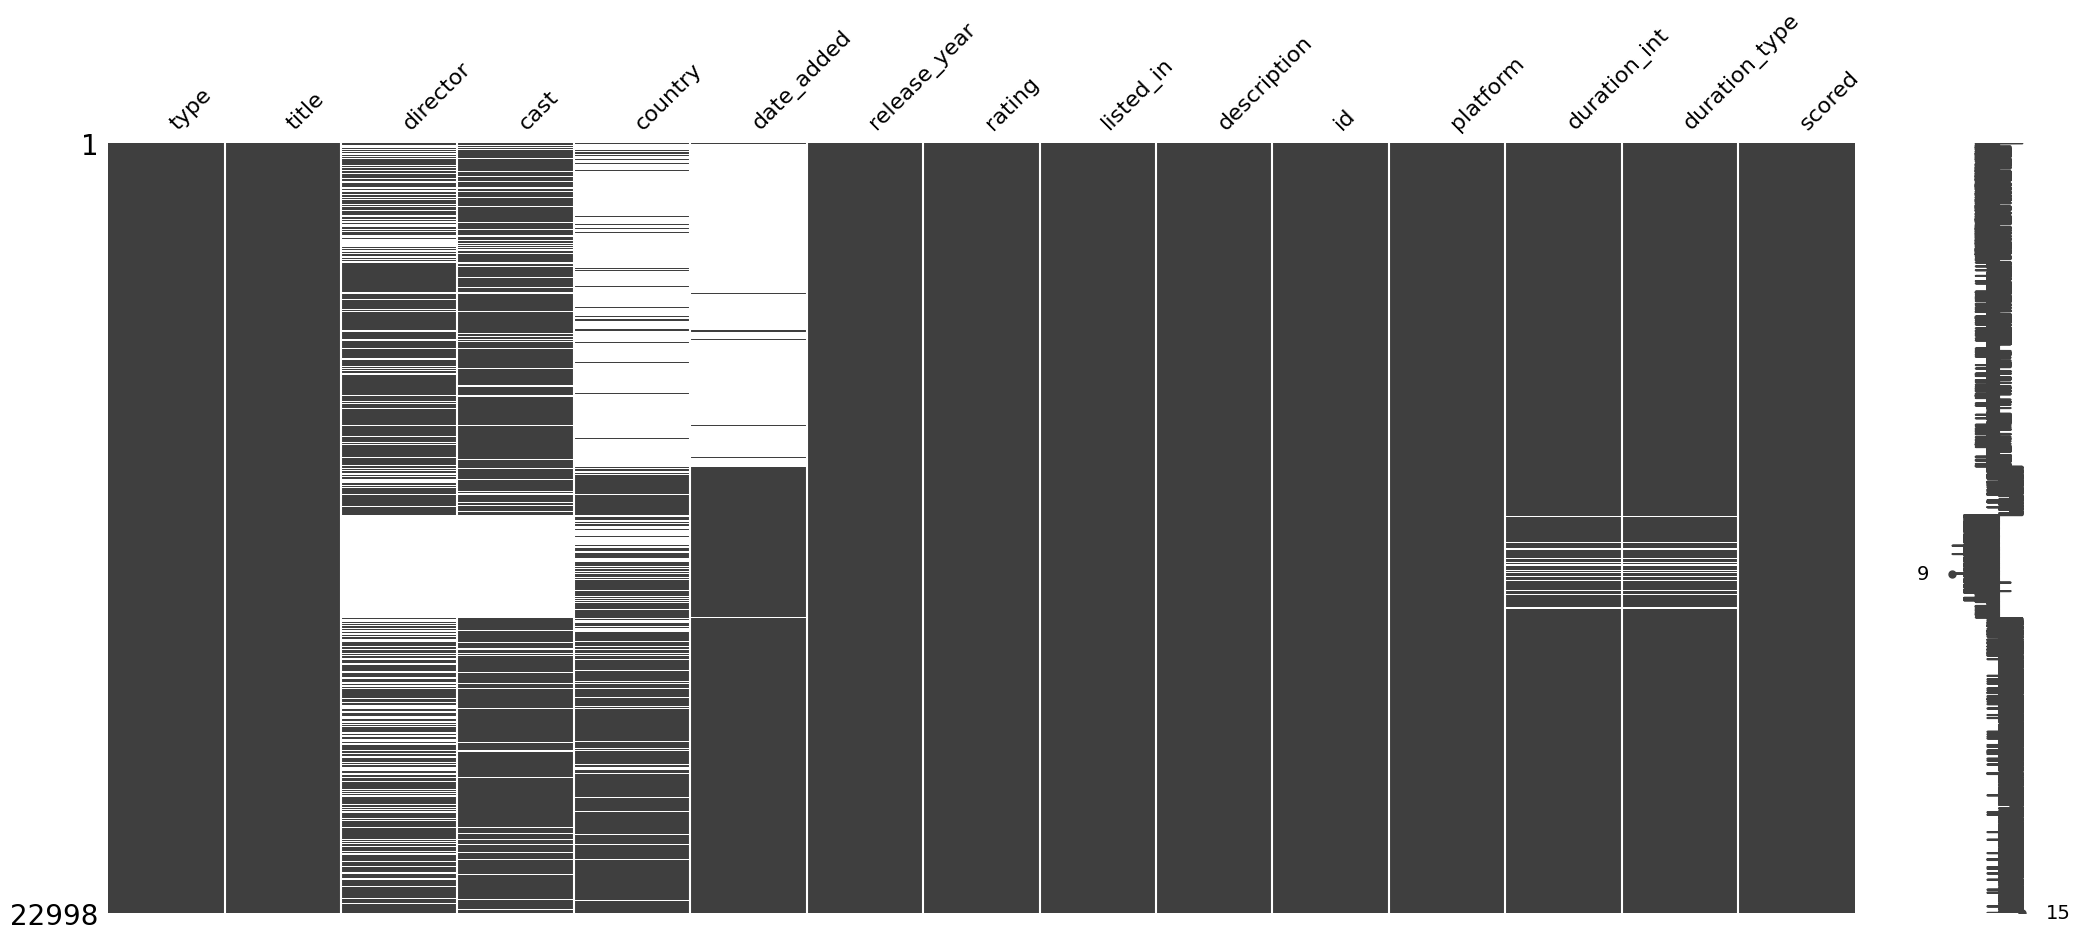

In [15]:
# Los espacios en blanco son los datos faltantes
import missingno as msno
msno.matrix(df_plataformas)

In [16]:
def missing_values(df):
    # Total de valores faltantes
    miss_val = df.isnull().sum()
    
    # Porcentaje de valores faltantes
    percent_miss_val = miss_val * 100 / len(df)
    
    # Hacer una tabla con los resultados
    table_miss_val = pd.concat([miss_val, percent_miss_val], axis = 1)
    
    # Renombrar las columnas
    rename_col = table_miss_val.rename(columns= {0: "Valores faltantes", 1: "% Valores faltantes"})
    
    # Ordenar la tabla de valores faltantes de forma descendente 
    rename_col = rename_col[rename_col.iloc[:,1] != 0].sort_values("% Valores faltantes",ascending=False).round(1)
    
    # Imprimir información resumida
    print("El dataframe tiene " + str(df.shape[1]) + " columnas.\n"
          "Hay " + str(rename_col.shape[0]) + " columnas que tienen valores faltantes.") 
    
    # Devuelve el dataframe de datos faltantes
    return rename_col

In [17]:
missing_values(df_plataformas)

El dataframe tiene 15 columnas.
Hay 7 columnas que tienen valores faltantes.


,Valores faltantes,% Valores faltantes
country,11499,50.0
date_added,9554,41.5
director,8259,35.9
cast,5321,23.1
duration_int,482,2.1
duration_type,482,2.1
description,4,0.0


<AxesSubplot: >

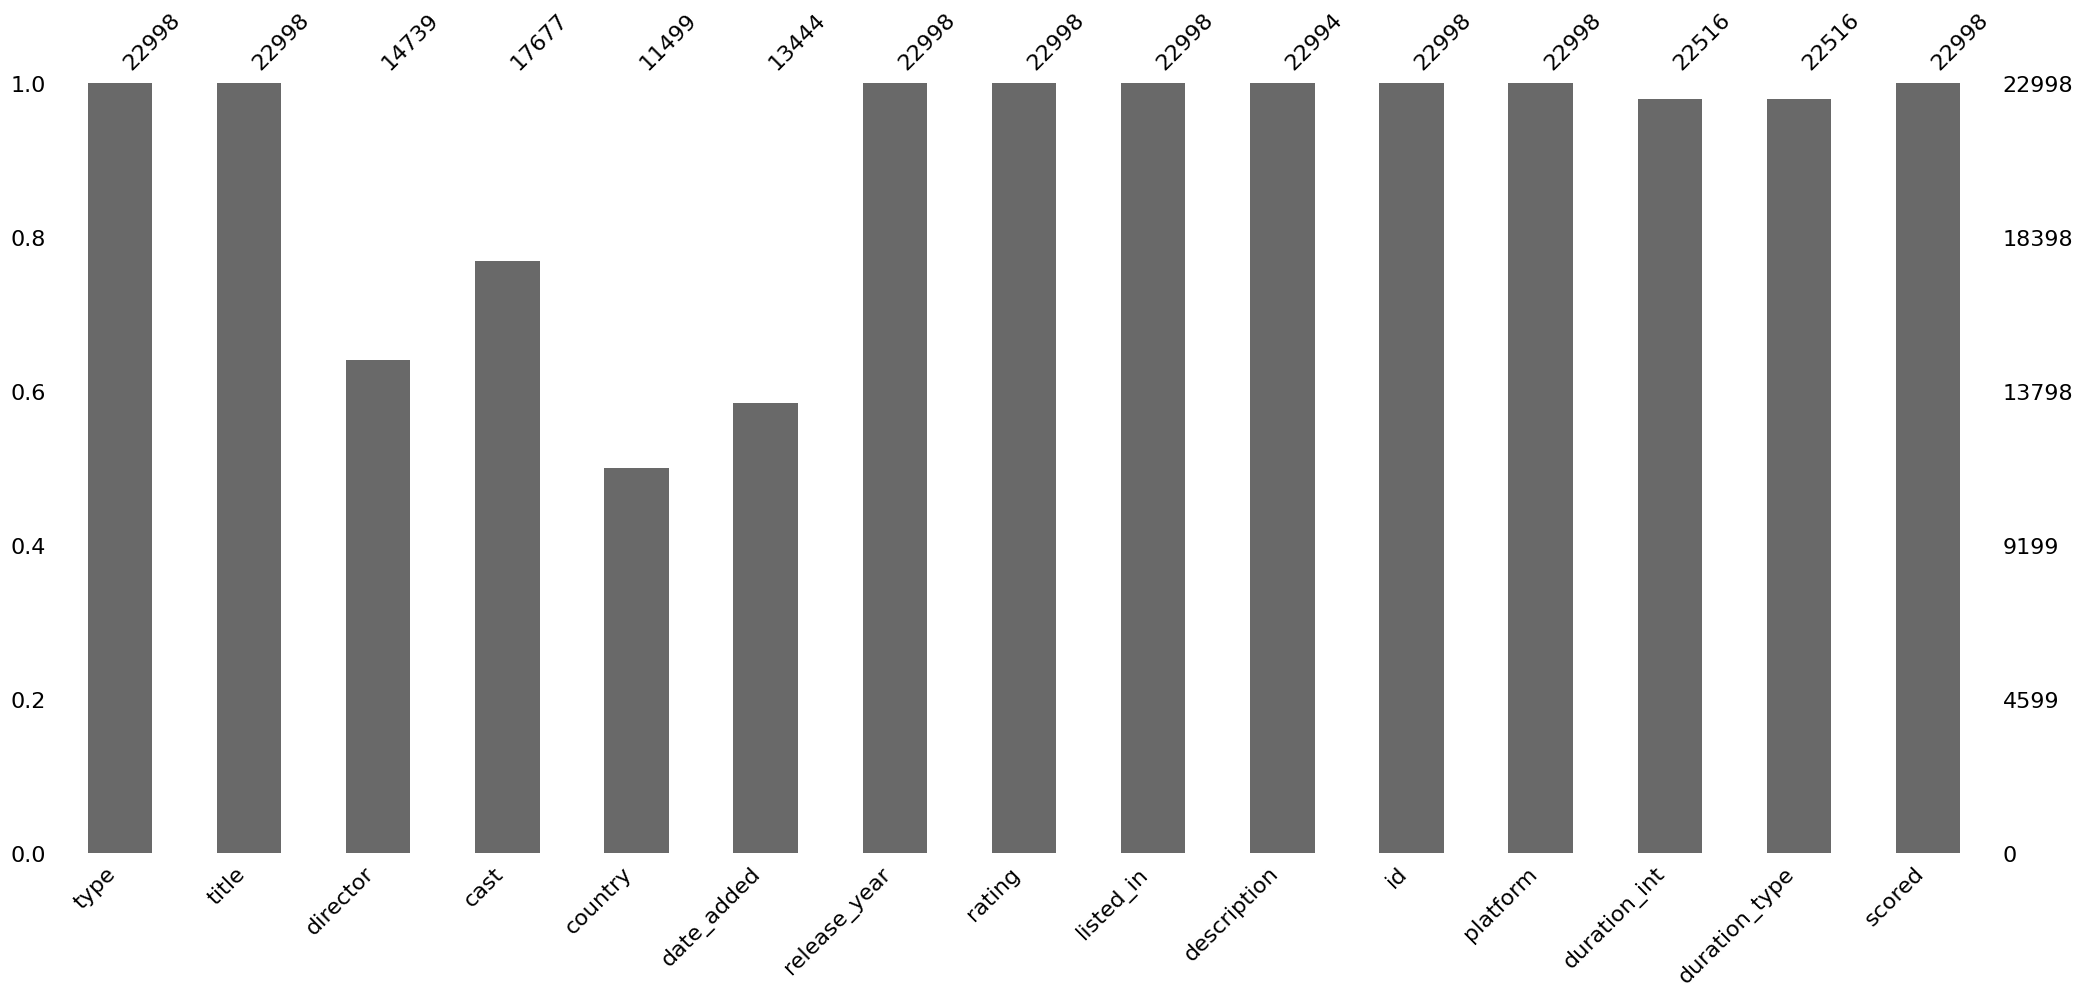

In [18]:
msno.bar(df_plataformas)

#### Informe de perfil de datos

In [19]:
# Informe de perfil de dataframe plataformas
profile_plataformas = ProfileReport(df_plataformas, title='Informe de perfil de datos')
profile_plataformas

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [20]:
# genera el informe de perfil de datos
profile_plataformas.to_file('Informe_plataformas.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### *Conclusiones plataformas*

Columnas con valores faltantes:
+ date_added
+ country
+ director
+ cast

No hay filas duplicadas

### Rating

In [21]:
# Importar el dataset y crear dataframes
df_rating = pd.read_csv("df_rating.csv")

In [22]:
# Visualizar el dataframe 
df_rating.head(2)

,userId,scored,timestamp,id
0,1,1.0,2015-03-09,as680
1,1,4.5,2015-03-09,ns2186


In [24]:
# Descripción de la forma o dimensión del dataset
print(f"Hay {df_rating.shape[0]} filas y {df_rating.shape[1]} columnas")

Hay 11024289 filas y 4 columnas


In [25]:
# Tipo de dato de cada columna del dataframe
df_rating.dtypes

userId         int64
scored       float64
timestamp     object
id            object
dtype: object

In [26]:
# Observamos si el dataframe tiene valores nulos
df_rating.isnull().sum()

userId       0
scored       0
timestamp    0
id           0
dtype: int64

In [27]:
# Verificar si hay valores duplicados
df_rating.duplicated().sum()

10466

In [28]:
# Eliminamos los valores duplicados
df_rating = df_rating.drop_duplicates()

In [29]:
# Verificar 
df_rating.duplicated().sum()

0

In [30]:
# Exportamos el dataframe df_plataformas en formato csv
df_rating.to_csv('df_score.csv', index=False)

### *Conclusiones ratings*

+ No hay columnas con valores faltantes

+ No hay filas duplicadas